# Nidhi: 

# 1)Employment_type, (Univariant)
# 2) Salary vs Company_size, (Pair Plot) 
# 3)Average Salary vs Time, (Pair Plot) 
# 4) Salary vs Remote ratio, (Pair Plot) 
# 5) company_location(Univariant)

In [85]:
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st        
import numpy as np


In [86]:
#Reading the Data Set
df=pd.read_csv("./ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [87]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [88]:
#Checking for null values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [89]:
#dropiing the same information column for salary
df=df.drop(['salary','salary_currency'], axis=1)


In [90]:
#renaming employment types 
df['employment_type']=df['employment_type'].replace("FT", "Full-time")
df['employment_type']=df['employment_type'].replace("PT", "Part-time")
df['employment_type']=df['employment_type'].replace("CT", "Contractual")
df['employment_type']=df['employment_type'].replace("FL", "Freelancer")

df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,Full-time,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,Contractual,ML Engineer,30000,US,100,US,S
2,2023,MI,Contractual,ML Engineer,25500,US,100,US,S
3,2023,SE,Full-time,Data Scientist,175000,CA,100,CA,M
4,2023,SE,Full-time,Data Scientist,120000,CA,100,CA,M


In [91]:
#renaming company size
df['company_size']=df['company_size'].replace("L", "Large")
df['company_size']=df['company_size'].replace("M", "Medium")
df['company_size']=df['company_size'].replace("S", "Small")
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,Full-time,Principal Data Scientist,85847,ES,100,ES,Large
1,2023,MI,Contractual,ML Engineer,30000,US,100,US,Small
2,2023,MI,Contractual,ML Engineer,25500,US,100,US,Small
3,2023,SE,Full-time,Data Scientist,175000,CA,100,CA,Medium
4,2023,SE,Full-time,Data Scientist,120000,CA,100,CA,Medium


In [92]:
#Finding the number of rows and column of Data set
a, b = df.shape
print("Data_Set shape: rows {} & columns {}".format(a, b))

Data_Set shape: rows 3755 & columns 9


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


In [94]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


# Univariant Analysis of Employment Type and Company Locations

In [95]:
# Employment_Type
employment_type = df["employment_type"].value_counts()
employment_type

Full-time      3718
Part-time        17
Contractual      10
Freelancer       10
Name: employment_type, dtype: int64

<Axes: title={'center': 'Employment Type Counts'}, xlabel='Employment Type', ylabel='Counts'>

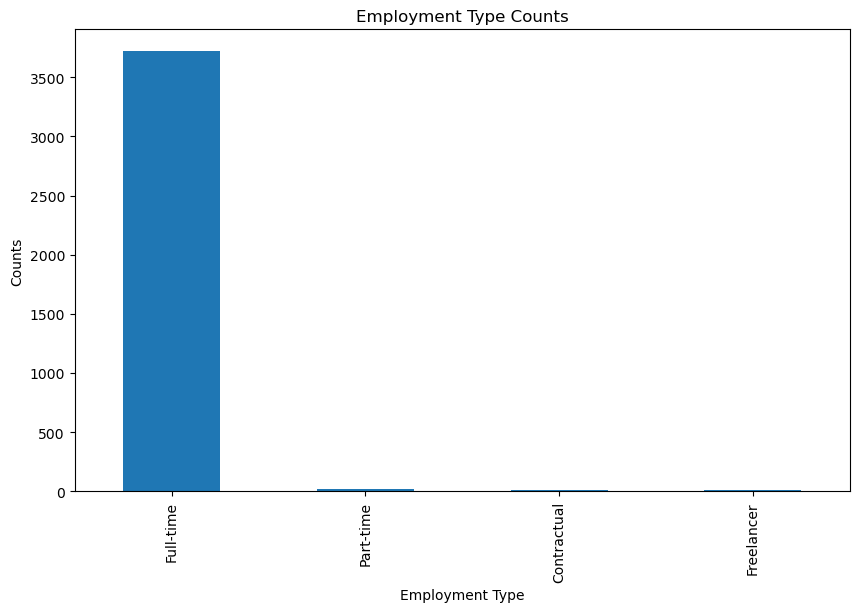

In [96]:
employment_type.plot(
    kind="bar",
    figsize=(10,6), 
    title="Employment Type Counts",
    xlabel="Employment Type",
    ylabel="Counts",
    fontsize=10)


In [97]:
#company_location
company_locations_counts=df["company_location"].value_counts()
top5_company_locations= company_locations_counts.head()

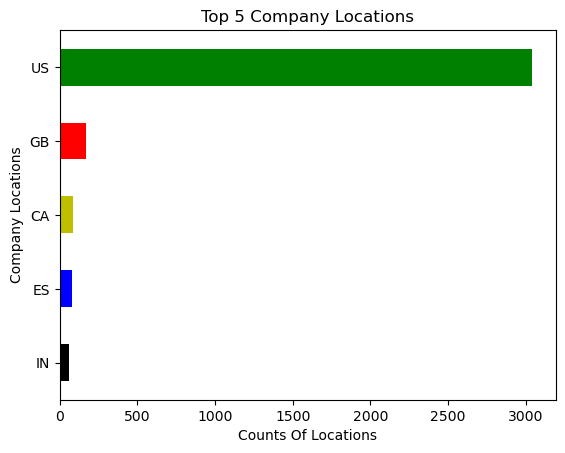

In [98]:
#Top 5 company loations
top5_company_locations.plot(
    kind="barh",
    color=["g","r","y","b","k"],
    title="Top 5 Company Locations",
    xlabel = "Counts Of Locations", 
    ylabel ="Company Locations",
).invert_yaxis()

# Pair Plotting or Bivariant Analysis

In [99]:
# Salary vs Company_size
#calculatig average salary by comapny size
avg_salary_by_company_size = df.groupby("company_size")["salary_in_usd"].mean()
avg_salary_by_company_size   

company_size
Large     118300.982379
Medium    143130.548367
Small      78226.682432
Name: salary_in_usd, dtype: float64

<Axes: xlabel='Company Size', ylabel='Average Salary (USD)'>

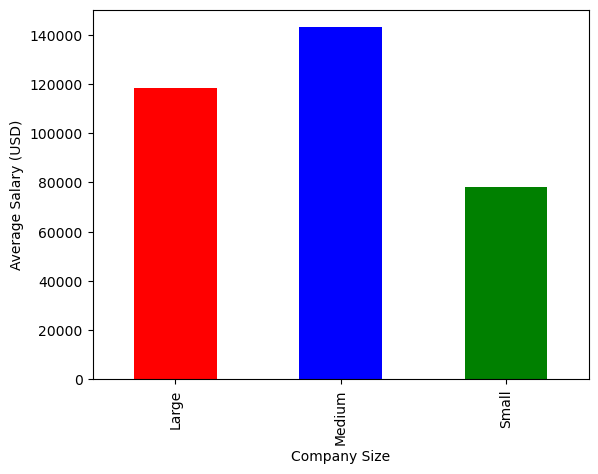

In [100]:
# Bar chart for Average Salary by Company Size
avg_salary_by_company_size.plot(
    kind="bar",
    color=["red", "blue","green"],
    xlabel = "Company Size", 
    ylabel ="Average Salary (USD)")

In [101]:
#Average Salary vs Time
avg_salary_over_years=df.groupby("work_year")["salary_in_usd"].mean()
avg_salary_over_years

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

<Axes: xlabel='Year', ylabel='Average Salary (USD)'>

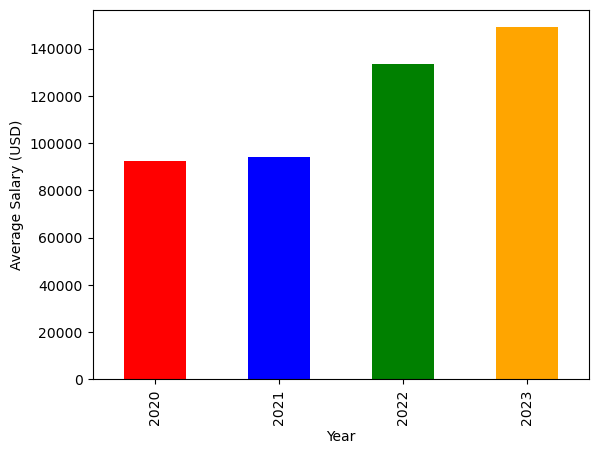

In [102]:
#How have the average salaries changed in from 2020 to 2023?
avg_salary_over_years.plot(
    kind="bar",
    color=["r", "b","g","orange"],
    xlabel = "Year", 
    ylabel ="Average Salary (USD)")

In [103]:

# Salary vs Remote ratio
avg_salary_remote_ratio=df.groupby("remote_ratio")["salary_in_usd"].mean()
avg_salary_remote_ratio

remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64

<Axes: xlabel='Remote Ratio (%)', ylabel='Average Salary (USD)'>

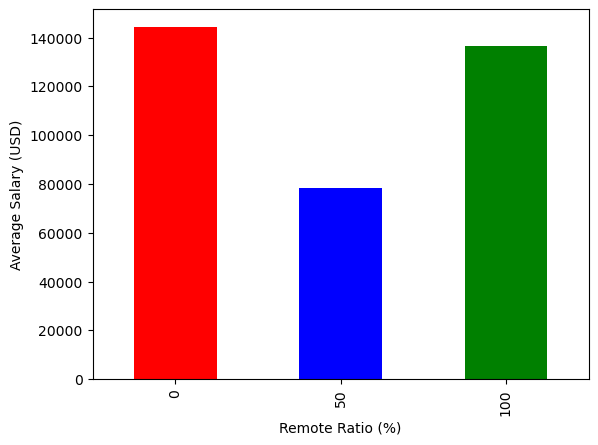

In [104]:
avg_salary_remote_ratio.plot(
    kind="bar",
    color=["r", "b","g"],
    xlabel = "Remote Ratio (%)", 
    ylabel ="Average Salary (USD)")